In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('graded_exams.csv')

In [3]:
def prepare_data(subject, df):
    # Prepare features and target
    X = df.drop(columns=[f'{subject} grade'])
    X = pd.get_dummies(X, drop_first=True)  # Onehot encoding
    y = df[f'{subject} grade']

    # Encode target labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_test, X_unseen, y_test, y_unseen = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_unseen_scaled = scaler.transform(X_unseen)

    return X_train_scaled, X_test_scaled, X_unseen_scaled, y_train, y_test, y_unseen

In [4]:
def train_and_evaluate_nb(X_train, y_train):
    nb_model = GaussianNB()
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(nb_model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"Cross-validation Accuracy (Mean): {np.mean(cross_val_acc):.4f}")

    # Train final model
    nb_model.fit(X_train, y_train)
    return nb_model

In [5]:
def evaluate_model(model, X, y, dataset_name, subject):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)

    print(f"\n{subject} {dataset_name} Evaluation:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y, y_pred, average='weighted'))
    print("ROC-AUC:", roc_auc_score(y, y_proba, multi_class='ovr'))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Greens' if dataset_name == 'Test' else 'Oranges')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {subject} {dataset_name} Set")
    plt.show()

In [6]:
def process_subject(subject, df):
    X_train, X_test, X_unseen, y_train, y_test, y_unseen = prepare_data(subject, df)
    model = train_and_evaluate_nb(X_train, y_train)

    evaluate_model(model, X_test, y_test, 'Test', subject)
    evaluate_model(model, X_unseen, y_unseen, 'Unseen', subject)

Cross-validation Accuracy (Mean): 0.6781

math Test Evaluation:
Accuracy: 0.67
Precision: 0.5416586782861293
Recall: 0.67
F1 Score: 0.5884748584748585
ROC-AUC: 0.8676889807880361


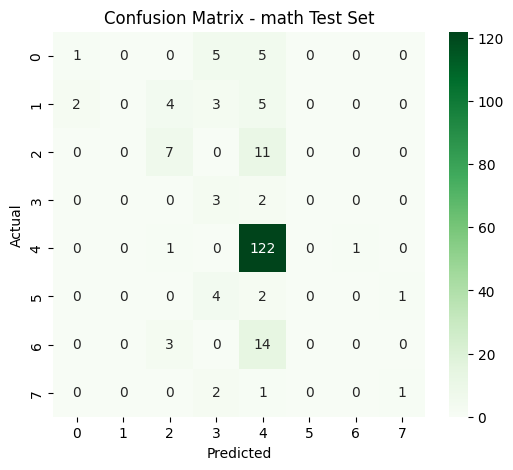


math Unseen Evaluation:
Accuracy: 0.66
Precision: 0.5237380952380952
Recall: 0.66
F1 Score: 0.5688514225500527
ROC-AUC: 0.8505122844215252


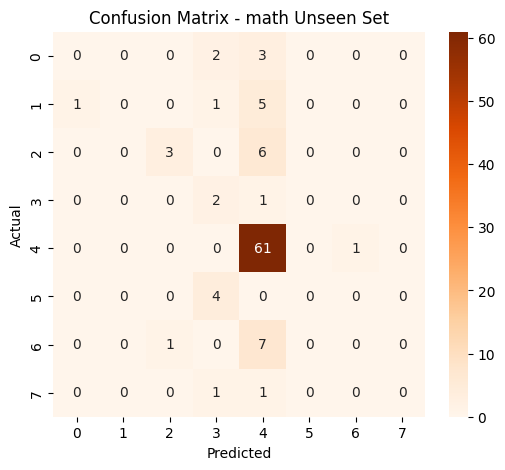

In [7]:
process_subject('math', df)

Cross-validation Accuracy (Mean): 0.6724

reading Test Evaluation:
Accuracy: 0.685
Precision: 0.6748992744344856
Recall: 0.685
F1 Score: 0.625493037043846
ROC-AUC: 0.9382265503556917


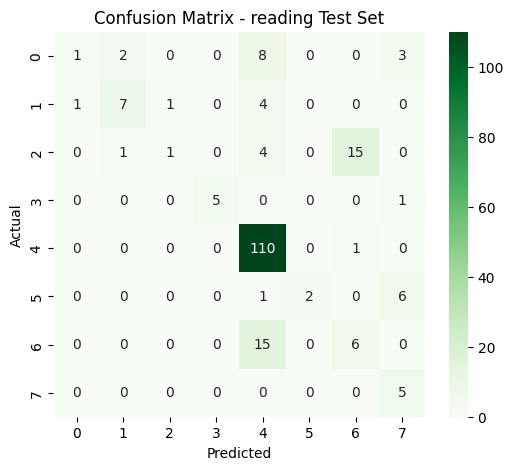


reading Unseen Evaluation:
Accuracy: 0.67
Precision: 0.6671859903381642
Recall: 0.67
F1 Score: 0.6144433591309653
ROC-AUC: 0.9187489939032557


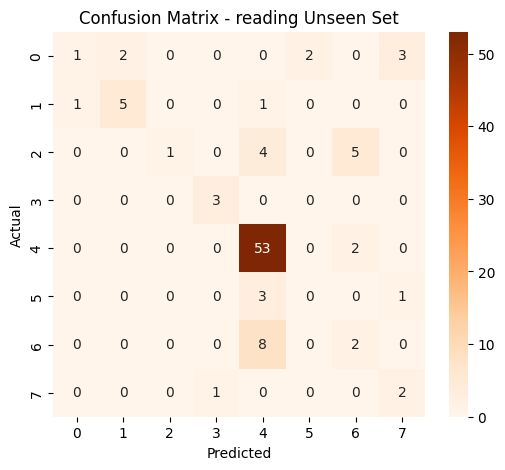

In [8]:
process_subject('reading', df)

Cross-validation Accuracy (Mean): 0.7454

writing Test Evaluation:
Accuracy: 0.715
Precision: 0.7909825361920468
Recall: 0.715
F1 Score: 0.7147038200892416
ROC-AUC: 0.9555610039567342


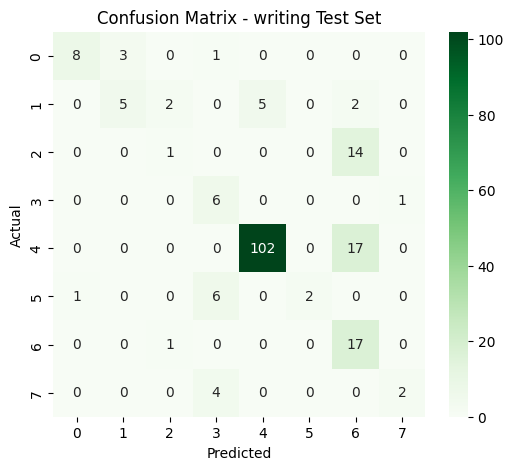


writing Unseen Evaluation:
Accuracy: 0.71
Precision: 0.7340903540903541
Recall: 0.71
F1 Score: 0.6934366685945633
ROC-AUC: 0.9008278994828992


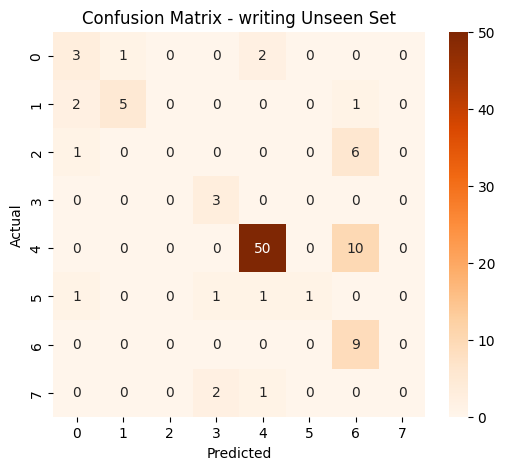

In [9]:
process_subject('writing', df)